# **Part A**

# **Context**

 An airline company is introducing several flights across various routes as part of its new strategy. The company wants to build a machine-learning model that can help the company predict flight prices using various parameters.

# **Objective**

 To build a model that predicts the price of flight.

### **Data Dictionary**



The data set contains information on various flights and their prices:

**Parameters:** Airline, source, destination, duration, total stops, etc.

**Price:** Price of the flight

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Load the Excel files
df = pd.read_excel('/content/drive/MyDrive/Data-1.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
# B. Check missing values and print percentage
missing =df.isnull().sum() / len(df) * 100
print("Missing Value Percentage:\n", missing)


Missing Value Percentage:
 Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009362
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009362
Additional_Info    0.000000
Price              0.000000
dtype: float64


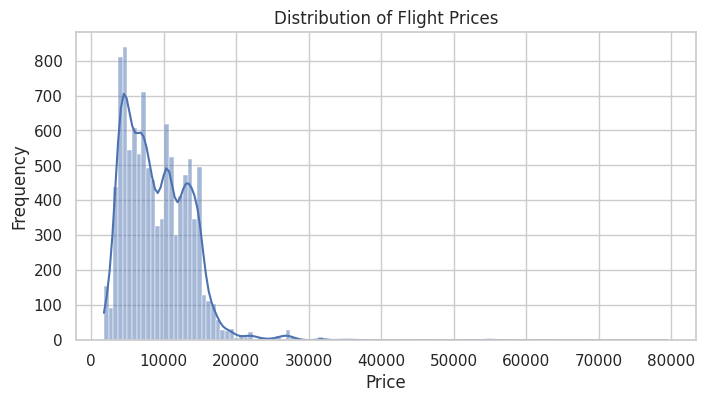

In [ ]:
# Univariate
sns.set(style="whitegrid")
# 1. Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

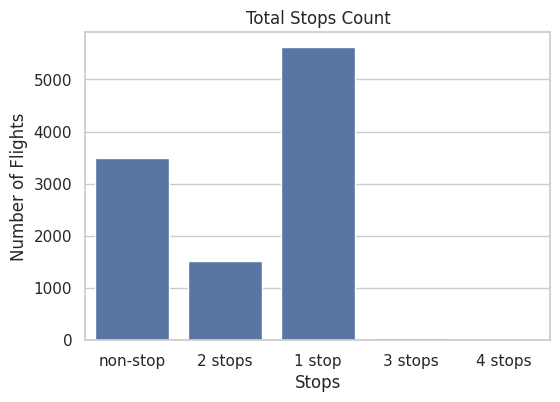

In [ ]:
# 2. Total Stops count
plt.figure(figsize=(6, 4))
sns.countplot(x='Total_Stops', data=df, palette='muted')
plt.title('Total Stops Count')
plt.xlabel('Stops')
plt.ylabel('Number of Flights')
plt.show()

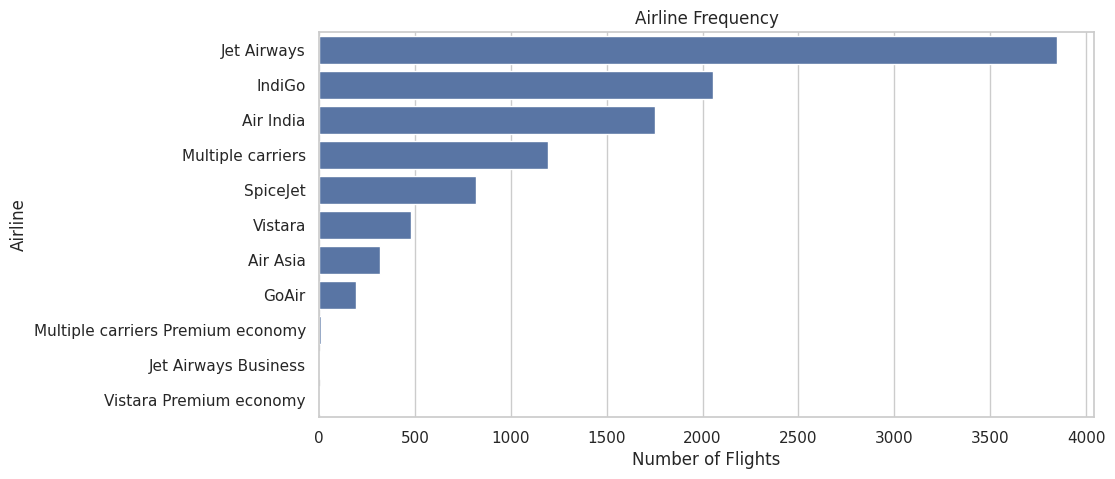

In [ ]:
# 3. Airline frequency
plt.figure(figsize=(10, 5))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title('Airline Frequency')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()

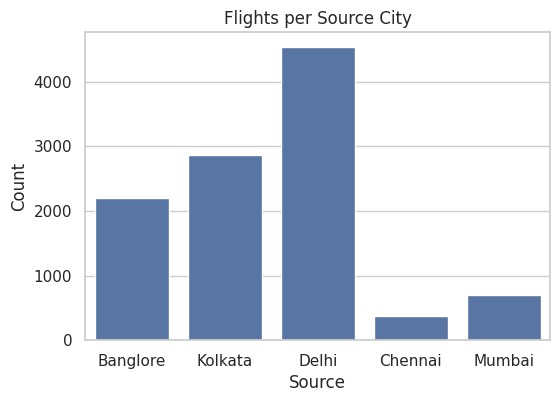

In [ ]:
# 4. Source distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Source', data=df)
plt.title('Flights per Source City')
plt.xlabel('Source')
plt.ylabel('Count')
plt.show()


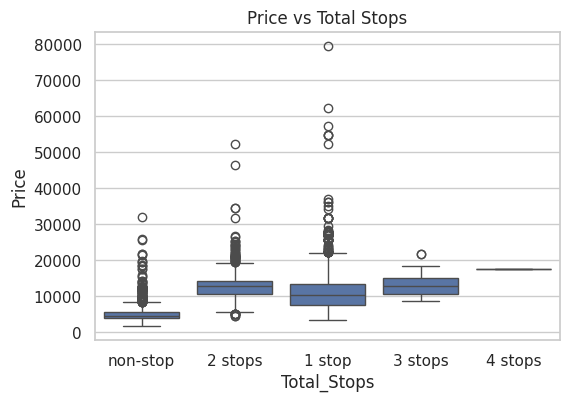

In [ ]:
# 1. Price vs Total Stops
plt.figure(figsize=(6, 4))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Price vs Total Stops')
plt.show()

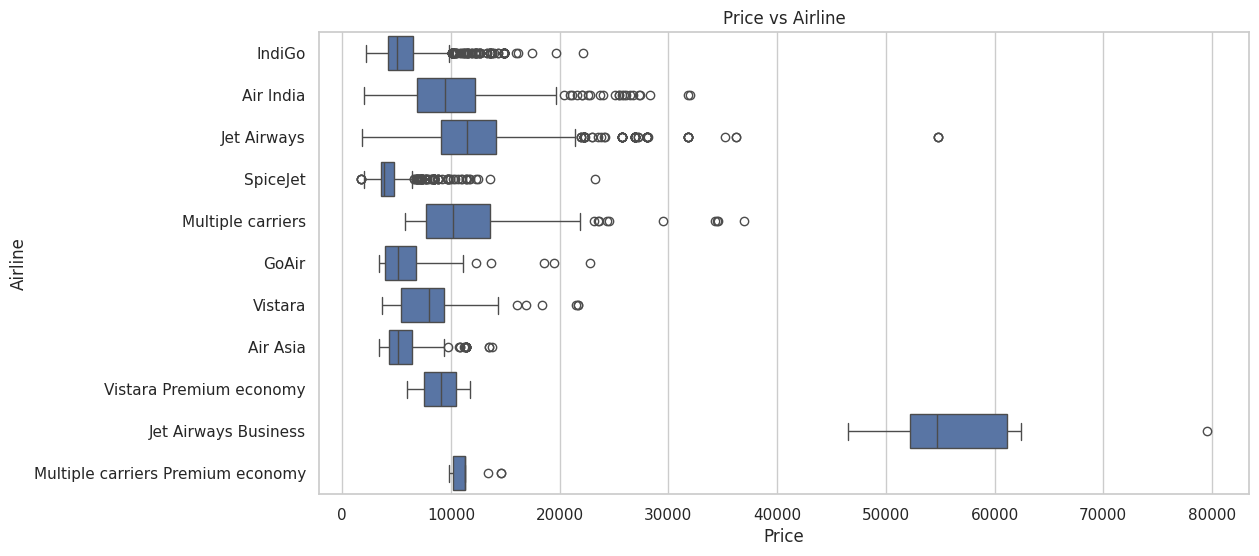

In [ ]:

# 2. Price vs Airline
plt.figure(figsize=(12, 6))
sns.boxplot(y='Airline', x='Price', data=df)
plt.title('Price vs Airline')
plt.show()


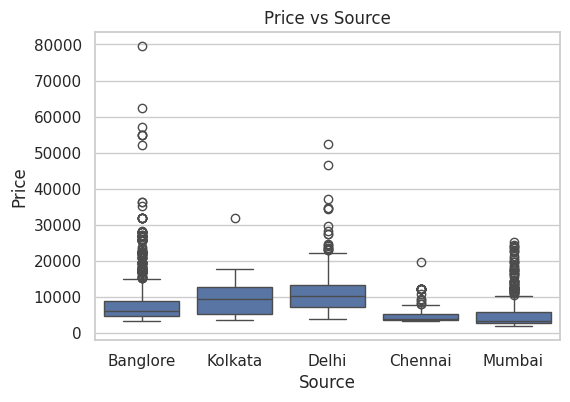

In [ ]:
# 3. Price vs Source
plt.figure(figsize=(6, 4))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Price vs Source')
plt.show()

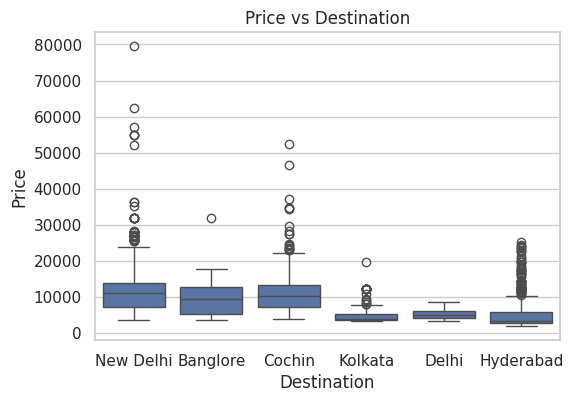

In [ ]:
# 4. Price vs Destination
plt.figure(figsize=(6, 4))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Price vs Destination')
plt.show()

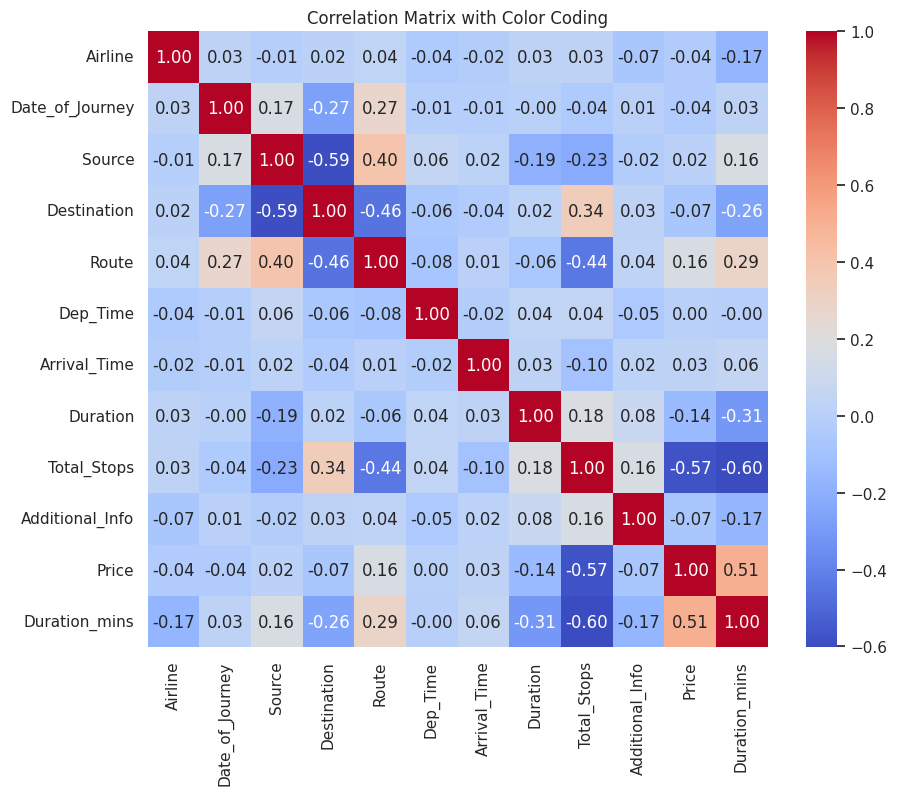

In [ ]:
# Convert Duration into numerical minutes if needed (e.g., '2h 50m' → 170)
import numpy as np

# Sample conversion for Duration
def convert_duration(x):
    h, m = 0, 0
    if 'h' in x:
        h = int(x.split('h')[0].strip())
        if 'm' in x:
            m = int(x.split('h')[1].split('m')[0].strip())
    elif 'm' in x:
        m = int(x.split('m')[0].strip())
    return h * 60 + m

df['Duration_mins'] = df['Duration'].apply(convert_duration)

# Encode categorical columns for correlation
df_corr = df.copy()
categorical_cols = df_corr.select_dtypes(include='object').columns
df_corr[categorical_cols] = df_corr[categorical_cols].astype('category').apply(lambda x: x.cat.codes)

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Color Coding')
plt.show()


### Share insights from the initial data analysis

1.   Flights with more stops or longer durations tend to be priced higher.



2.   Some airlines consistently show higher prices (e.g., premium airlines).



In [ ]:
#A. Split the data into X & Y.
X = df.drop('Price', axis=1)
Y = df['Price']


In [ ]:
# Split the data into training , validation and test with 70:20,10 proportion
X_temp, X_test, Y_temp, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=2/9, random_state=42)


In [ ]:
# D. Transform Labels into format acceptable by Neural Network
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
X_test = pd.get_dummies(X_test)

X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [ ]:
#C. Normalise the training ,validation and test data with appropriate method.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)


In [ ]:
#A. Design a Neural Network to train the model.
model = Sequential(
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
)
#B. Train the model using appropriate parameters.
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, Y_train, a
                    validation_data=(X_val_scaled, Y_val),
                    epochs=100,
                    batch_size=32,
                    verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediction on training data
y_train_pred = model.predict(X_train_scaled)


#  Training Set Evaluation
mse_train = mean_squared_error(Y_train, y_train_pred)
mae_train = mean_absolute_error(Y_train, y_train_pred)
r2_train = r2_score(Y_train, y_train_pred)

print(f"   MSE (Mean Squared Error): {mse_train:.2f}")
print(f"   MAE (Mean Absolute Error): {mae_train:.2f}")
print(f"   R² Score: {r2_train:.2f}\n")

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 Training Set:
   MSE (Mean Squared Error): 258958.64
   MAE (Mean Absolute Error): 298.14
   R² Score: 0.99



In [ ]:

# Predict on test set data
y_pred = model.predict(X_test_scaled)

# Compute metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print results
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" R² Score: {r2:.2f}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
 Mean Squared Error (MSE): 7083026.00
 Mean Absolute Error (MAE): 1396.39
 R² Score: 0.68


In [ ]:
#prediction on evaluation data
y_val_pred = model.predict(X_val_scaled)

# Validation Set Evaluation
mse_val = mean_squared_error(Y_val, y_val_pred)
mae_val = mean_absolute_error(Y_val, y_val_pred)
r2_val = r2_score(Y_val, y_val_pred)

print("🔹 Validation Set:")
print(f"   MSE (Mean Squared Error): {mse_val:.2f}")
print(f"   MAE (Mean Absolute Error): {mae_val:.2f}")
print(f"   R² Score: {r2_val:.2f}\n")

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
🔹 Validation Set:
   MSE (Mean Squared Error): 7145914.50
   MAE (Mean Absolute Error): 1335.85
   R² Score: 0.67



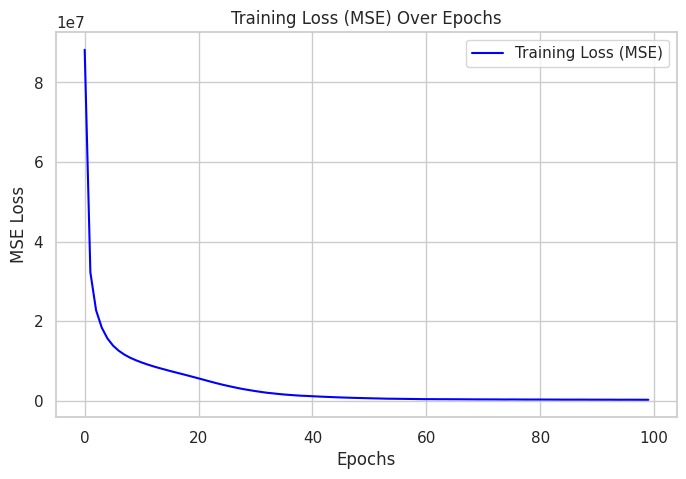

In [ ]:
#C. Plot 2 separate visuals.
# Plot 1: Training Loss (MSE) vs epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], color='blue', label='Training Loss (MSE)')
plt.title('Training Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()



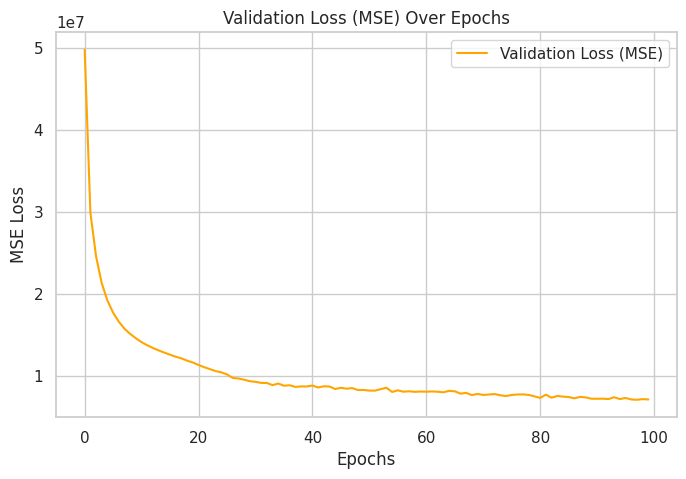

In [ ]:
# Plot 2: Validation Loss (MSE) vs epochs
plt.figure(figsize=(8, 5))
plt.plot(history.history['val_loss'], color='orange', label='Validation Loss (MSE)')
plt.title('Validation Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Improved Model Architecture
model_improved = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),

    Dense(1)  # Output layer for regression
])

# Compile the model
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Train the model
history_improved = model_improved.fit(
    X_train_scaled, Y_train,
    validation_data=(X_val_scaled, Y_val),
    epochs=100,
    batch_size=32,
    verbose=0
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Prediction on training data
y_train_pred = model_improved.predict(X_train_scaled)


#  Training Set Evaluation
mse_train = mean_squared_error(Y_train, y_train_pred)
mae_train = mean_absolute_error(Y_train, y_train_pred)
r2_train = r2_score(Y_train, y_train_pred)

print(f"   MSE (Mean Squared Error): {mse_train:.2f}")
print(f"   MAE (Mean Absolute Error): {mae_train:.2f}")
print(f"   R² Score: {r2_train:.2f}\n")

234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
🔹 Training Set:
   MSE (Mean Squared Error): 4871702.00
   MAE (Mean Absolute Error): 528.75
   R² Score: 0.77



In [ ]:

# Predict on test set data
y_pred = model_improved.predict(X_test_scaled)

# Compute metrics
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Print results
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" R² Score: {r2:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
 Mean Squared Error (MSE): 23717266.00
 Mean Absolute Error (MAE): 1185.60
 R² Score: -0.08


In [ ]:
#prediction on evaluation data
y_val_pred = model_improved.predict(X_val_scaled)

# Validation Set Evaluation
mse_val = mean_squared_error(Y_val, y_val_pred)
mae_val = mean_absolute_error(Y_val, y_val_pred)
r2_val = r2_score(Y_val, y_val_pred)

print(f"   MSE (Mean Squared Error): {mse_val:.2f}")
print(f"   MAE (Mean Absolute Error): {mae_val:.2f}")
print(f" R² Score: {r2_val:.2f}")


67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
   MSE (Mean Squared Error): 4436627.00
   MAE (Mean Absolute Error): 997.91
 R² Score: 0.79


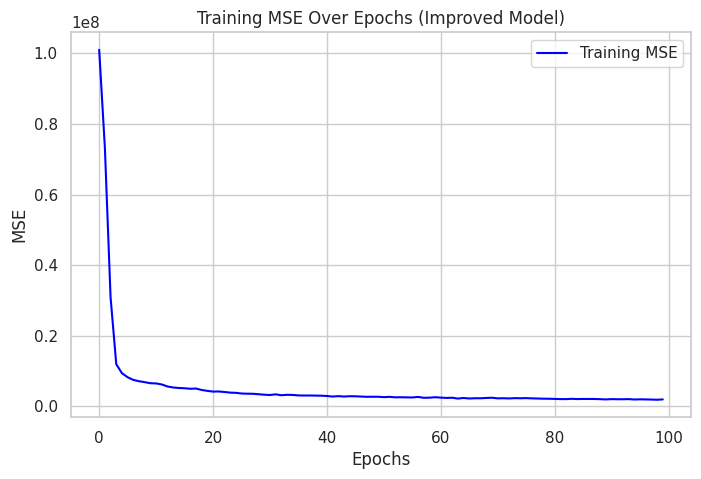

In [ ]:
#training loss vs epochs
plt.figure(figsize=(8, 5))
plt.plot(history_improved.history['loss'], color='blue', label='Training MSE')
plt.title('Training MSE Over Epochs (Improved Model)') # Updated title for clarity
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

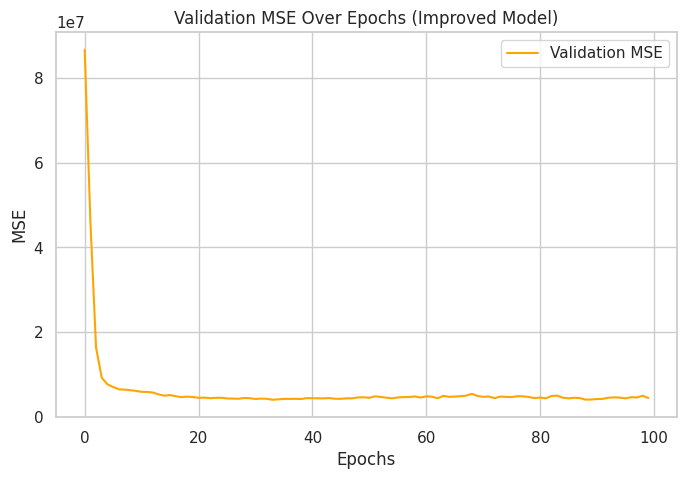

In [ ]:
#validation loss vs epochs
plt.figure(figsize=(8, 5))
plt.plot(history_improved.history['val_loss'], color='orange', label='Validation MSE')
plt.title('Validation MSE Over Epochs (Improved Model)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

## Performance

1. The improved model has a lower validation MSE (4,436,627.00 vs. 7,145,914.50) and MAE (997.91 vs. 1,335.85) compared to the first model. This means the improved model makes better predictions on the validation data, likely because of the added BatchNormalization and Dropout layers

2. On the test set, the improved model performs much worse with a higher MSE (23,717,266.00 vs. 7,083,026.00) and a negative R² score (-0.08 vs. 0.68). This shows the improved model is not good at predicting new, unseen data, possibly because the Dropout layers (0.3) are dropping too much information during training.

3. The improved model uses BatchNormalization, which likely makes the training loss (MSE) decrease more smoothly over epochs compared to the first model. The first model’s training loss might have more ups and downs because it doesn’t have this layer to stabilize learning.

4. The first model has a very low training MSE (258,958.64) but high validation/test MSE, showing it overfits the training data. The improved model reduces overfitting (validation R² improved to 0.79 from 0.67), but it generalizes poorly to the test set (negative R²)

# **Part-B**

## **Context**

The production rate of cars has been rising progressively during the past decade, with almost 92 million cars being produced in the year 2019. This big rise has allowed the used car market to now come into the picture together with some additional costs that are incurred by the govt. majorly within the various types of taxes. So, customers who buy a replacement car remain assured of the money that they invest to be righteous.

But because of such increase in prices of the new cars and therefore the inability of the many customers to shop for a replacement car thanks to the dearth of sufficient funds, they like used cars which has resulted in a worldwide increase in the sales of used cars. Therefore, there's a necessity to possess a secondhand car price prediction model to accurately determine the worthiness of the car considering a range of features.

A company named Ucars predicts the price of used cars. A lot of customers approach them to get an estimate of the price of the used car that they want to buy. You are working as a Data Scientist in the Ucars team developing the model that can predict the price of these used cars.

## **Objective**

To build a model that predicts the price of cars.

## **Data Dictionary**

**Model:** The brand and model of the car

**Year:** The year or edition of the model

**Transmission:** The type of transmission used by the car (Automatic / Manual)

**Mileage:** The standard mileage offered by the car company in kmpl or km/kg

**Price:** The price of the car

**Color:** The color of the car

In [ ]:
#A. Read the ‘usedcars.csv’ file and import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/usedcars-1.csv')
df.head()


,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Gray,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2011,SE,17500,8367,White,AUTO


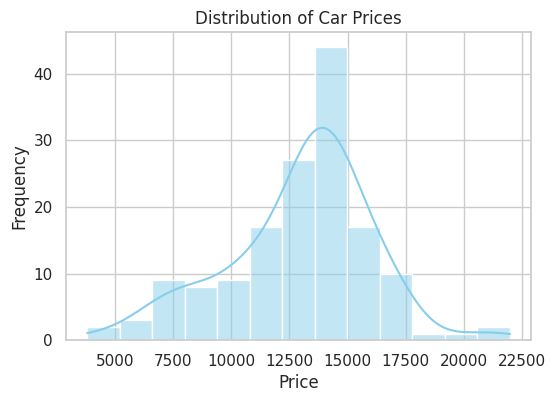

In [ ]:
# Univariate
# 1. Distribution of Car Prices
plt.figure(figsize=(6, 4))
sns.histplot(df['price'], kde=True, color='skyblue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




<ipython-input-59-857dc5f28954>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='Set2')


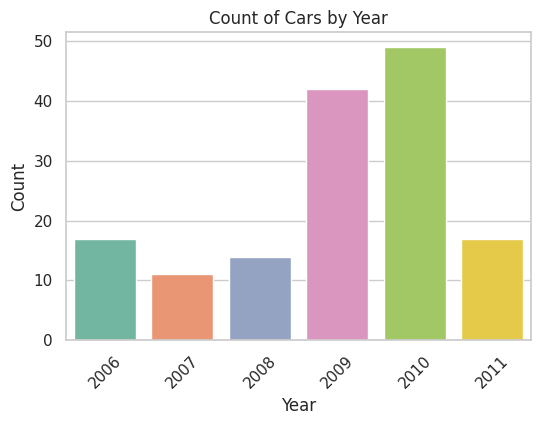

In [ ]:
# 2. Distribution of Car Manufacturing Year
plt.figure(figsize=(6, 4))
sns.countplot(x='year', data=df, palette='Set2')
plt.title('Count of Cars by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-60-af265b0065b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transmission', data=df, palette='pastel')


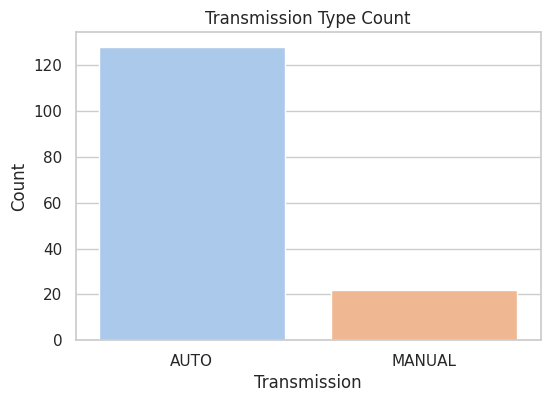

In [ ]:
# 3. Transmission Type
plt.figure(figsize=(6, 4))
sns.countplot(x='transmission', data=df, palette='pastel')
plt.title('Transmission Type Count')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()

<ipython-input-61-c2e07ceb9372>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='color', data=df, order=df['color'].value_counts().index, palette='viridis')


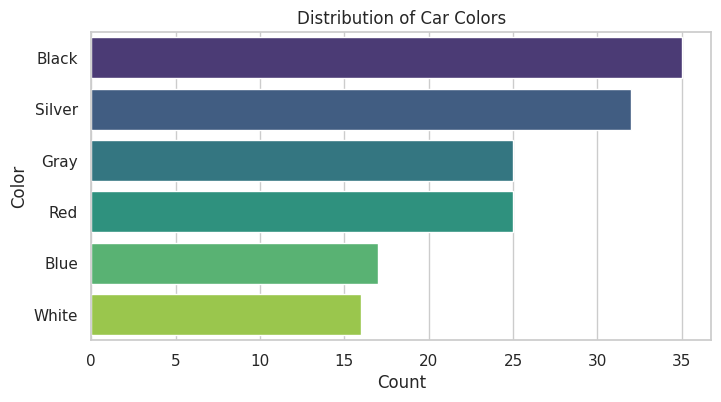

In [ ]:
# 4. Color Distribution
plt.figure(figsize=(8, 4))
sns.countplot(y='color', data=df, order=df['color'].value_counts().index, palette='viridis')
plt.title('Distribution of Car Colors')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

<ipython-input-62-8b5b3ee61001>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='year', y='price', data=df, palette='coolwarm')


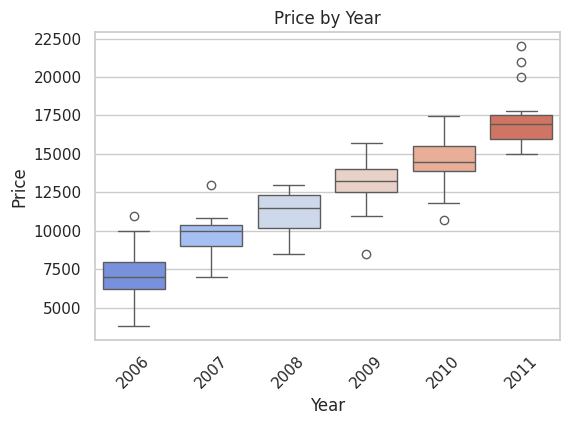

In [ ]:
#Bivariate
# 1. Price vs Year
plt.figure(figsize=(6, 4))
sns.boxplot(x='year', y='price', data=df, palette='coolwarm')
plt.title('Price by Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


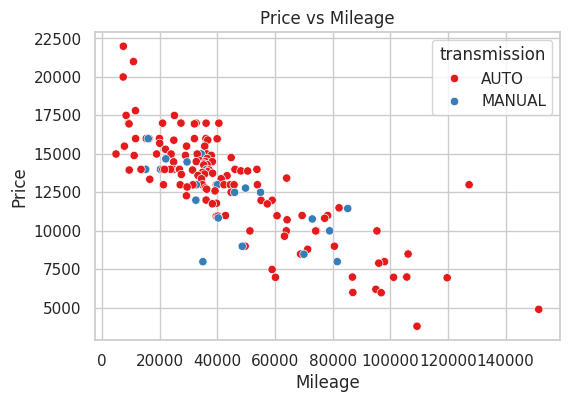

In [ ]:
# 2. Price vs Mileage
plt.figure(figsize=(6, 4))
sns.scatterplot(x='mileage', y='price', data=df, hue='transmission', palette='Set1')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()



<ipython-input-64-eac9775d9a9d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='price', data=df, palette='Accent')


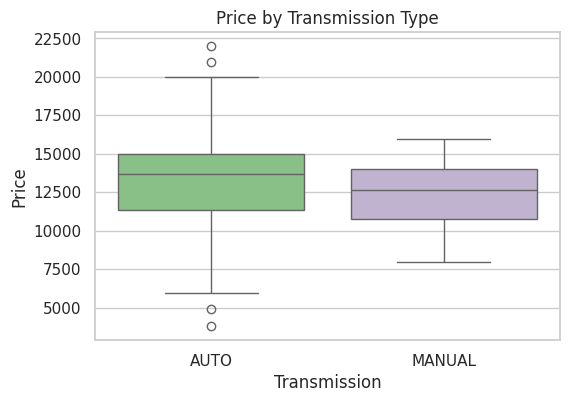

In [ ]:
# 3. Price vs Transmission
plt.figure(figsize=(6, 4))
sns.boxplot(x='transmission', y='price', data=df, palette='Accent')
plt.title('Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

<ipython-input-65-26b74d84c94a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='color', y='price', data=df, palette='Paired')


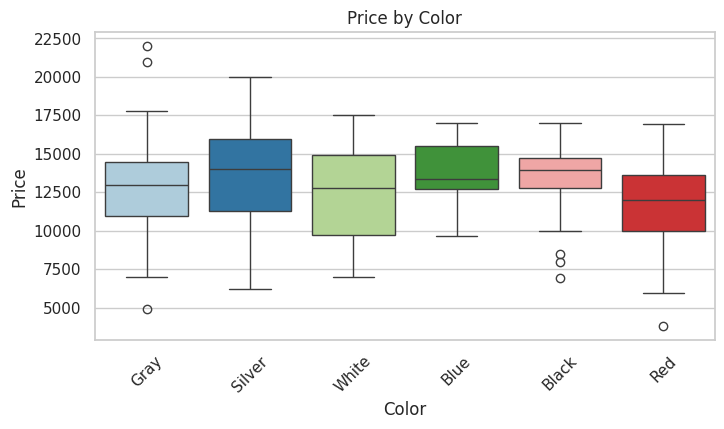

In [ ]:
# 4. Price vs Color
plt.figure(figsize=(8, 4))
sns.boxplot(x='color', y='price', data=df, palette='Paired')
plt.title('Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

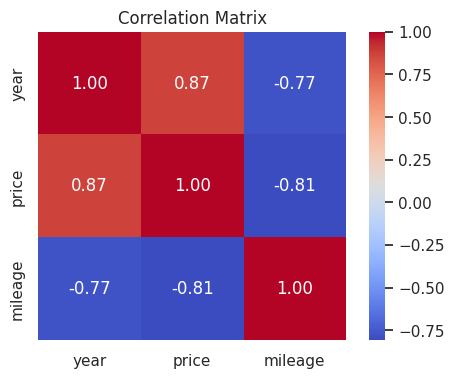

In [ ]:
# Selecting only numeric features
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#D. Check for and remove outliers if any
Q1 = used_df["price"].quantile(0.25)
Q3 = used_df["price"].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = (
    (used_df["price"] < (Q1 - 1.5 * IQR)) |
    (used_df["price"] > (Q3 + 1.5 * IQR))
)
used_df_clean = used_df[~outlier_condition].reset_index(drop=True)

print("Shape before outlier removal:", used_df.shape)
print("Shape after outlier removal: ", used_df_clean.shape)


Shape before outlier removal: (150, 6)
Shape after outlier removal:  (146, 6)


In [ ]:
X_cars = used_df_clean.drop("price", axis=1)
y_cars = used_df_clean["price"]

In [ ]:
#A. Convert categorical features to numerical features.
X_cars_encoded = pd.get_dummies(X_cars, drop_first=True)

In [ ]:
## Split the data into X_train, X_test, Y_train, Y_test
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cars_encoded, y_cars, test_size=0.20, random_state=42
)

print("Shapes after split (Used Cars):")
print("X_train:", X_train_c.shape, "y_train:", y_train_c.shape)
print("X_test: ", X_test_c.shape, "y_test: ", y_test_c.shape)



Shapes after split (Used Cars):
X_train: (116, 10) y_train: (116,)
X_test:  (30, 10) y_test:  (30,)


In [ ]:
#B. Do normalization of the dataset using appropriate method.
scaler_cars = StandardScaler()

X_train_c_scaled = scaler_cars.fit_transform(X_train_c)
X_test_c_scaled  = scaler_cars.transform(X_test_c)


In [ ]:
#A. Design a Neural Network to train the model.

model = Sequential([
    Dense(128, input_dim=X_train_c_scaled.shape[1], activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#B. Train the model using suitable parameters
history = model.fit(
    X_train_c_scaled, y_train_c.values,
    epochs=50,
    batch_size=32,
    validation_split=0.10,
    verbose=0
)

In [ ]:
#C. Evaluate performance of the model with appropriate metrics.
y_train_pred = model.predict(X_train_c_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
# Train performance
mae_train = mean_absolute_error(y_train_c, y_train_pred)
mse_train = mean_squared_error(y_train_c, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train_c, y_train_pred)


# Print the results
print("Train Set Performance:")
print(f"MAE  = {mae_train:.2f}")
print(f"MSE  = {mse_train:.2f}")
print(f"RMSE = {rmse_train:.2f}")
print(f"R² Score = {r2_train:.2f}")

Train Set Performance:
MAE  = 1066.95
MSE  = 1786040.25
RMSE = 1336.43
R² Score = 0.78


In [ ]:
# Predict on test set data using the SCALED test data
y_test_pred = model.predict(X_test_c_scaled)
# Test performance
mae_test = mean_absolute_error(y_test_c, y_test_pred)
mse_test = mean_squared_error(y_test_c, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test_c, y_test_pred)

print("\nTest Set Performance:")
print(f"MAE  = {mae_test:.2f}")
print(f"MSE  = {mse_test:.2f}")
print(f"RMSE = {rmse_test:.2f}")
print(f"R² Score = {r2_test:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step

Test Set Performance:
MAE  = 1659.21
MSE  = 4077234.75
RMSE = 2019.22
R² Score = 0.44


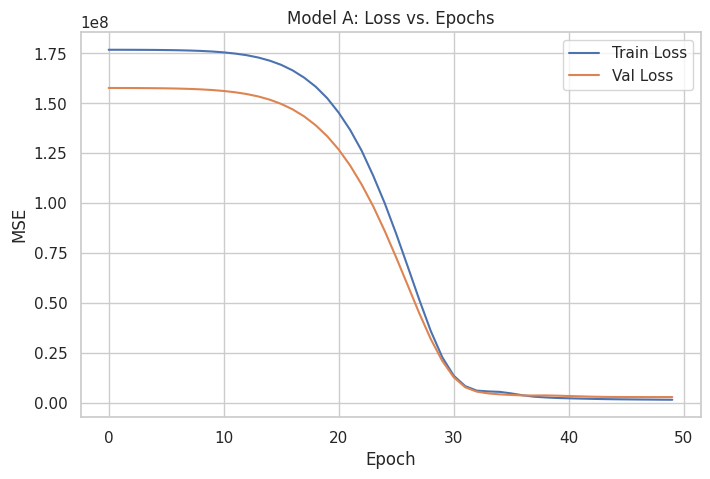

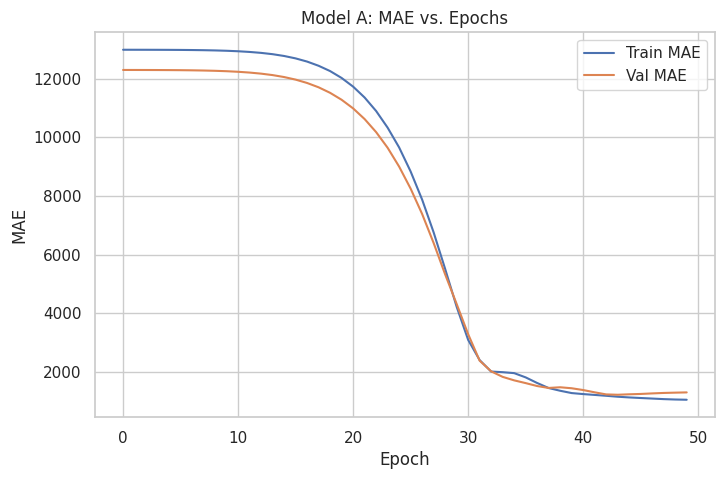

In [ ]:
#D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.
plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Model A: Loss vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()

# MAE
plt.figure(figsize=(8,5))
plt.plot(history.history["mae"], label="Train MAE")
plt.plot(history.history["val_mae"], label="Val MAE")
plt.title("Model A: MAE vs. Epochs")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()


### Observations :
1. The training loss (MSE) drops quickly and keeps going down, but the validation loss stops decreasing after around 20 epochs and stays higher. This means the model is learning well on the training data but isn’t improving on the validation data, showing it might be overfitting.

2. The training MAE decreases faster and gets very low, while the validation MAE decreases more slowly and stays higher. This shows the model predicts better on the training data but has a harder time predicting accurately on the validation data.

In [ ]:
#E. Design new architecture/update existing architecture in attempt to improve the performance of the model.
modelB = Sequential([
    Dense(128, activation="relu", input_shape=(X_train_c_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation="relu", input_shape=(X_train_c_scaled.shape[1],)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1)
])

modelB.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

modelB.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,433 (118.88 KB)

 Trainable params: 30,433 (118.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historyB = modelB.fit(
    X_train_c_scaled, y_train_c.values,
    epochs=50,
    batch_size=32,
    validation_split=0.10,
    verbose=1
)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 177262736.0000 - mae: 12996.7461 - val_loss: 157737296.0000 - val_mae: 12296.7764
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 176092432.0000 - mae: 12966.7256 - val_loss: 157721152.0000 - val_mae: 12296.1064
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 182366144.0000 - mae: 13192.3496 - val_loss: 157694768.0000 - val_mae: 12295.0186
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 181659216.0000 - mae: 13201.7686 - val_loss: 157651184.0000 - val_mae: 12293.2275
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 174996128.0000 - mae: 12924.2549 - val_loss: 157578928.0000 - val_mae: 12290.2607
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 175976240.0000 - mae: 12932.2354 - val_loss: 157459424.0000 - val_mae: 12285.3750
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 176169456.0000 - mae: 12974.4102 - val_loss: 157260000.0000 - val_mae: 12277.2373
Epoch 8/50
4/4 ━━━━━━━━━━━━

In [ ]:
lossB, maeB = modelB.evaluate(X_test_c_scaled, y_test_c.values, verbose=0)
y_pred_B = modelB.predict(X_test_c_scaled)
r2B = r2_score(y_test_c, y_pred_B)

print(f"Model B Test MSE: {lossB:.2f}, Test MAE: {maeB:.2f}, Test R²: {r2B:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Model B Test MSE: 3878289.50, Test MAE: 1662.35, Test R²: 0.46


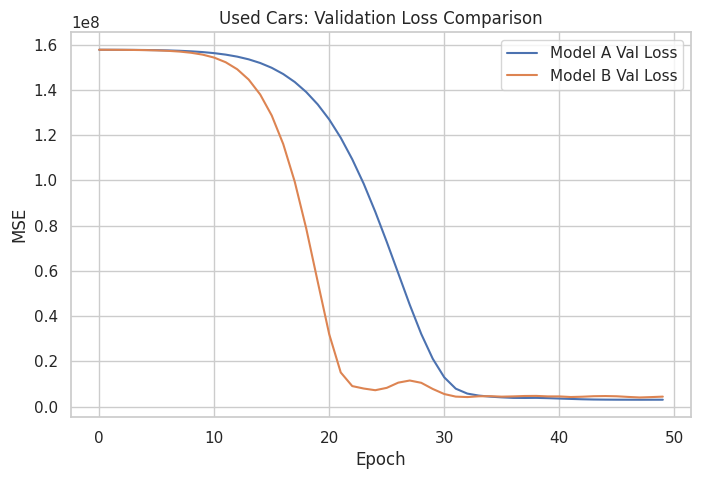

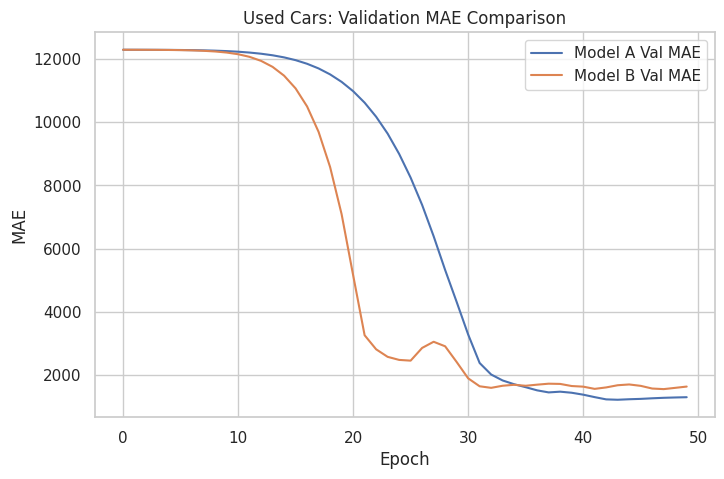

In [ ]:
#F. Plot visuals as in Q3.D and share insights about difference observed in both the models.
plt.figure(figsize=(8,5))
plt.plot(history.history["val_loss"], label="Model A Val Loss")
plt.plot(historyB.history["val_loss"], label="Model B Val Loss")
plt.title("Used Cars: Validation Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()


plt.figure(figsize=(8,5))
plt.plot(history.history["val_mae"], label="Model A Val MAE")
plt.plot(historyB.history["val_mae"], label="Model B Val MAE")
plt.title("Used Cars: Validation MAE Comparison")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.show()

## Observations :
1. Model B’s validation loss starts higher but decreases more steadily than Model A’s, which flattens earlier. This shows Model B keeps improving on validation data longer than Model A.

2. Model B’s validation MAE ends lower than Model A’s after 50 epochs, meaning Model B makes smaller errors on the validation data by the end of training.